1. Metadata

age: Numeric (continuous)
job: Categorical (e.g., "unemployed", "services", "management")
marital: Categorical (e.g., "married", "single")
education: Categorical (e.g., "primary", "secondary", "tertiary")
default: Categorical (e.g., "yes", "no")
balance: Numeric (continuous)
housing: Categorical (e.g., "yes", "no")
loan: Categorical (e.g., "yes", "no")
contact: Categorical (e.g., "cellular", "unknown")
day: Numeric (integer, day of the month)
month: Categorical (e.g., "oct", "may")
duration: Numeric (continuous, call duration in seconds)
campaign: Numeric (integer, number of contacts)
pdays: Numeric (integer, days since the client was last contacted)
previous: Numeric (integer, number of contacts before this campaign)
poutcome: Categorical (e.g., "unknown", "failure", "success")
y: Categorical (target variable, e.g., "yes", "no" - whether the client subscribed to a term deposit)

In [25]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn


column_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
                'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 
                'poutcome', 'y']



In [26]:
data = pd.read_csv(r'C:\Users\Home\OneDrive\Рабочий стол\3 курс\5 сем\семинар\bank.csv',  sep = ";", skipinitialspace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [27]:
# print important information about dataset
print("#Total of samples = ", data.shape[0])
print("#Features = ", data.shape[1])
#Total of samples =  4521
#Features =  17
# checking the missing values
print("Samples with 'unknown' values:")
print(data[data.eq("unknown").any(axis=1)].head())

#Total of samples =  4521
#Features =  17
Samples with 'unknown' values:
   age           job  marital  education default  balance housing loan  \
0   30    unemployed  married    primary      no     1787      no   no   
3   30    management  married   tertiary      no     1476     yes  yes   
4   59   blue-collar  married  secondary      no        0     yes   no   
7   39    technician  married  secondary      no      147     yes   no   
8   41  entrepreneur  married   tertiary      no      221     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
7  cellular    6   may       151         2     -1         0  unknown  no  
8   unknown   14   may        57         2     -1         0  unknown  no  


In [28]:
# replace data with 'unknown' by NaN
data.replace("unknown", np.nan, inplace=True)
#print(data[data.isna().any(axis=1)].head())
print("#Samples with missing values = ", len(data[data.isna().any(axis=1)]))
#Samples with missing values =  3757


#Samples with missing values =  3757


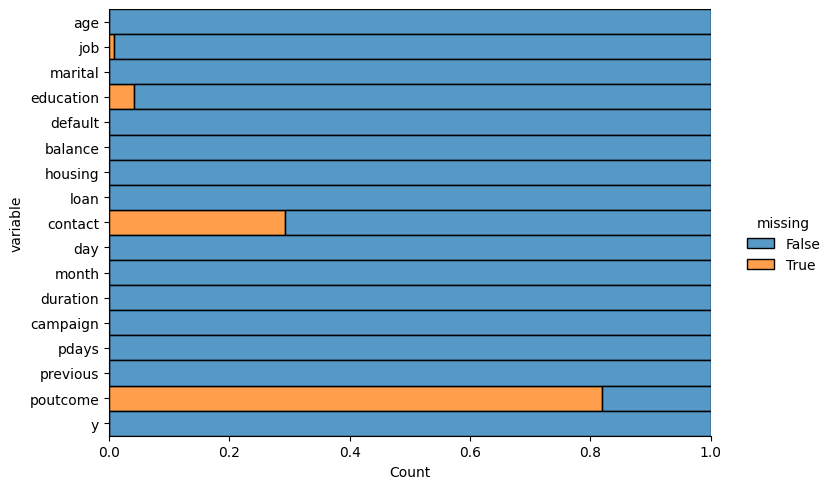

In [29]:
# plot missing data
sbn.displot(
    data = data.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [ ]:
This plot visualizes the proportion of missing data for each variable in the dataset. 
The presence or absence of missing values is represented as a stacked bar, where 
each bar corresponds to a variable. The chart helps identify which variables have
 missing values and the extent of the missingness in the data.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,NaN,yes
27,67,retired,married,NaN,no,696,no,no,telephone,17,aug,119,1,105,2,failure,no
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,NaN,yes
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,NaN,yes
39,23,services,single,tertiary,no,363,yes,no,NaN,30,may,16,18,-1,0,NaN,no


In [30]:
# Drop rows with missing values
data_clean = data.dropna()
print("#Total samples without missing values = ", len(data_clean))

#Total samples without missing values =  764


3. Descriptive Statistical Analysis
Numerical variables

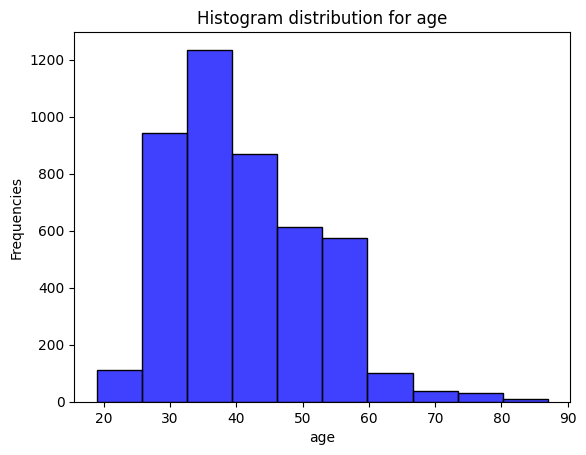

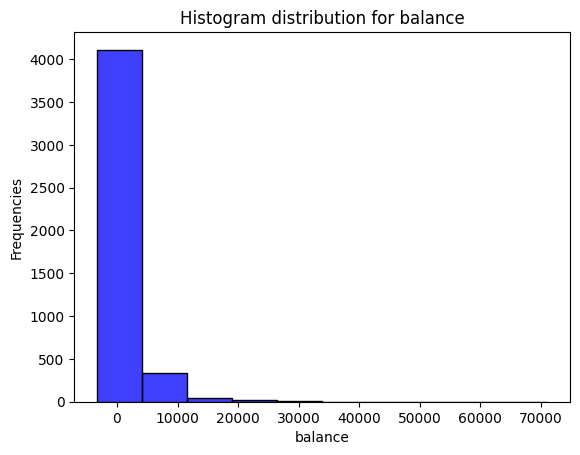

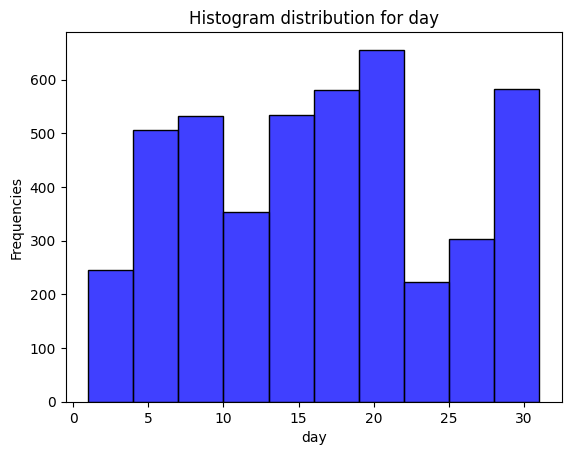

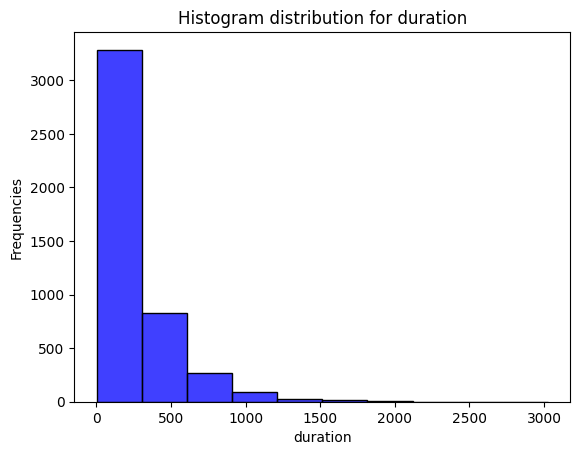

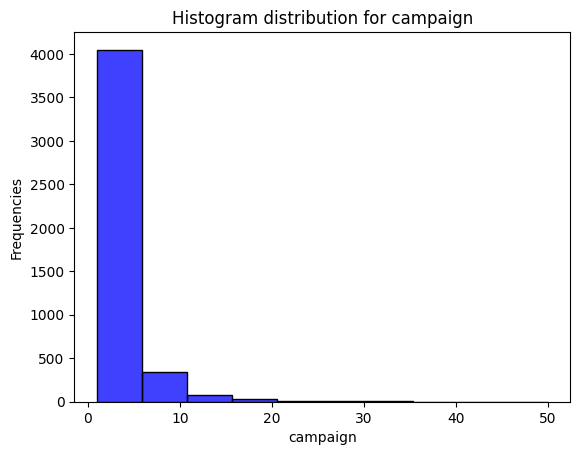

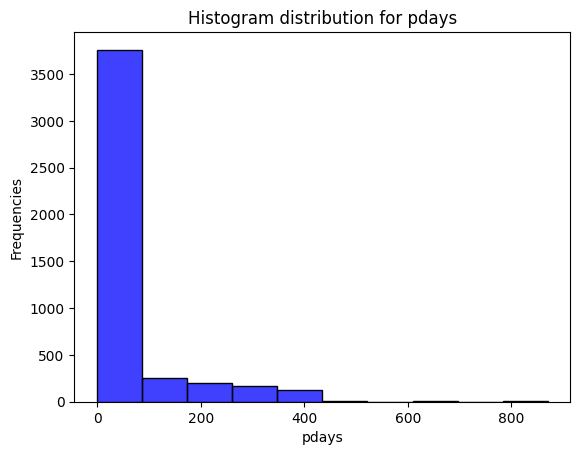

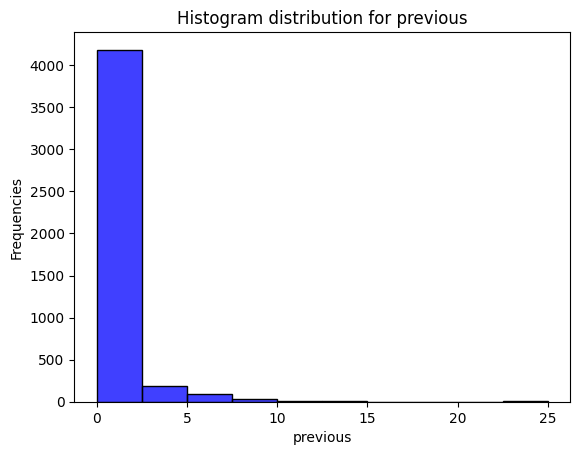

In [31]:
numerical_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# Histogram with Frequencies
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color="blue", bins=bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)
    plt.show()

# Plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(data, col, 10)

Each histogram represents the distribution of values for a specific numerical variable. The x-axis shows the range of values for the variable, while the y-axis represents the frequency of observations. This plot helps in identifying the shape of the distribution, whether it is skewed, normal, or has outliers.


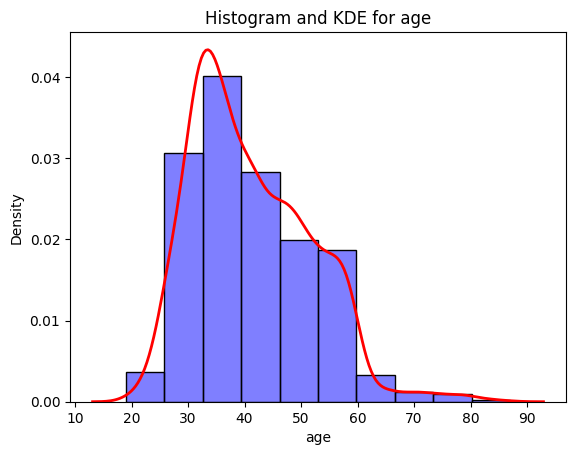

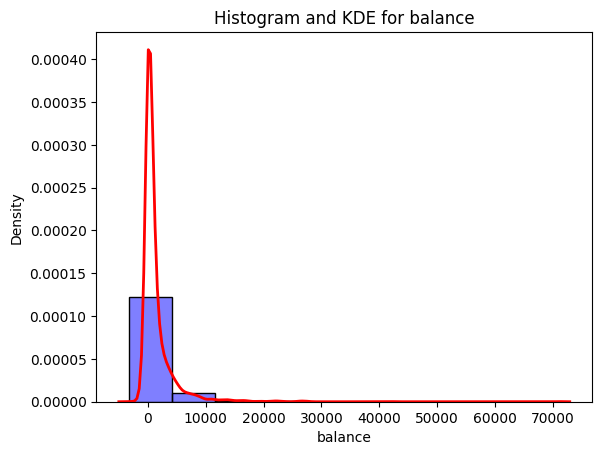

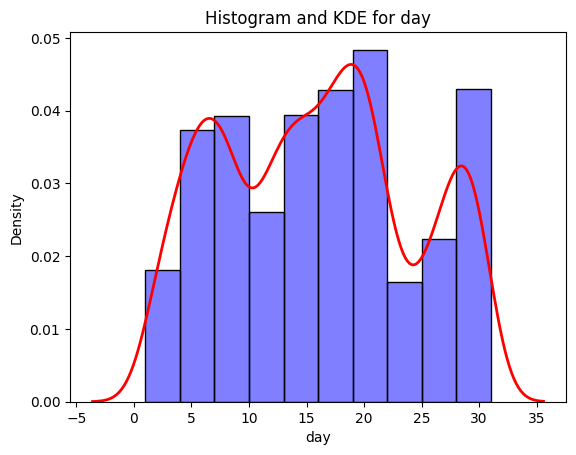

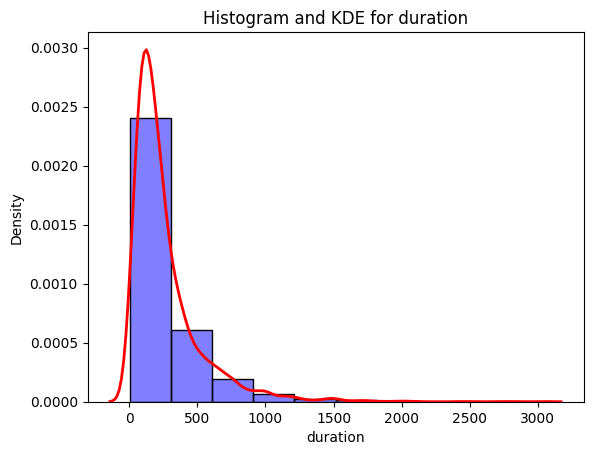

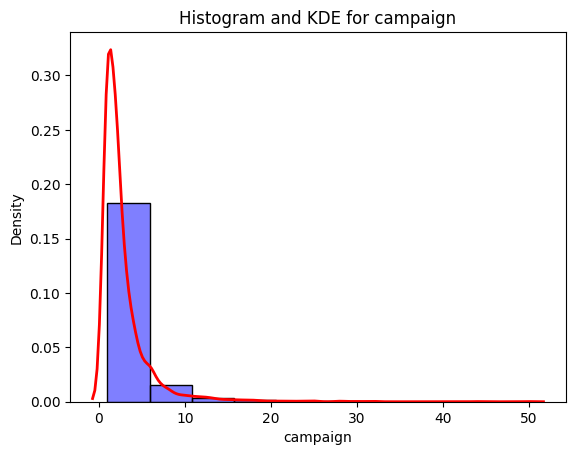

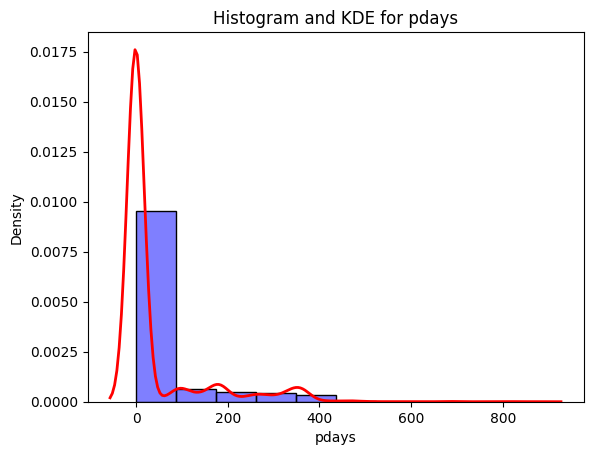

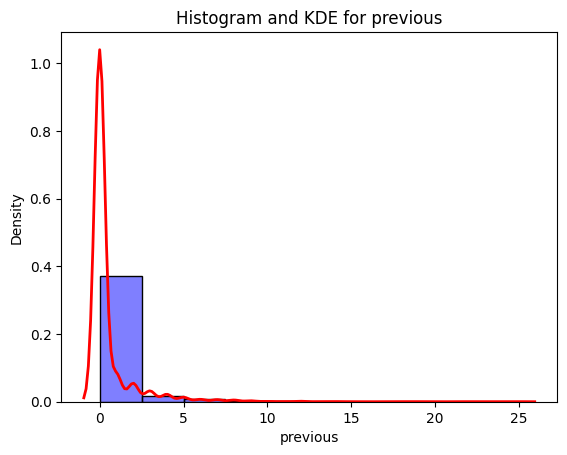

In [32]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color="blue", bins=bins, kde=False, stat="density", alpha=0.5)
    sbn.kdeplot(data[column], color="red", linewidth=2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)
    plt.show()

    # Plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(data, col, 10)

The histogram represents the distribution of the variable's values, while the red line (KDE) shows the probability density function estimated by a kernel density estimator. This visualization helps to understand the distribution of the data (whether it is skewed, normal, or has outliers) and provides a smooth estimate of the density.


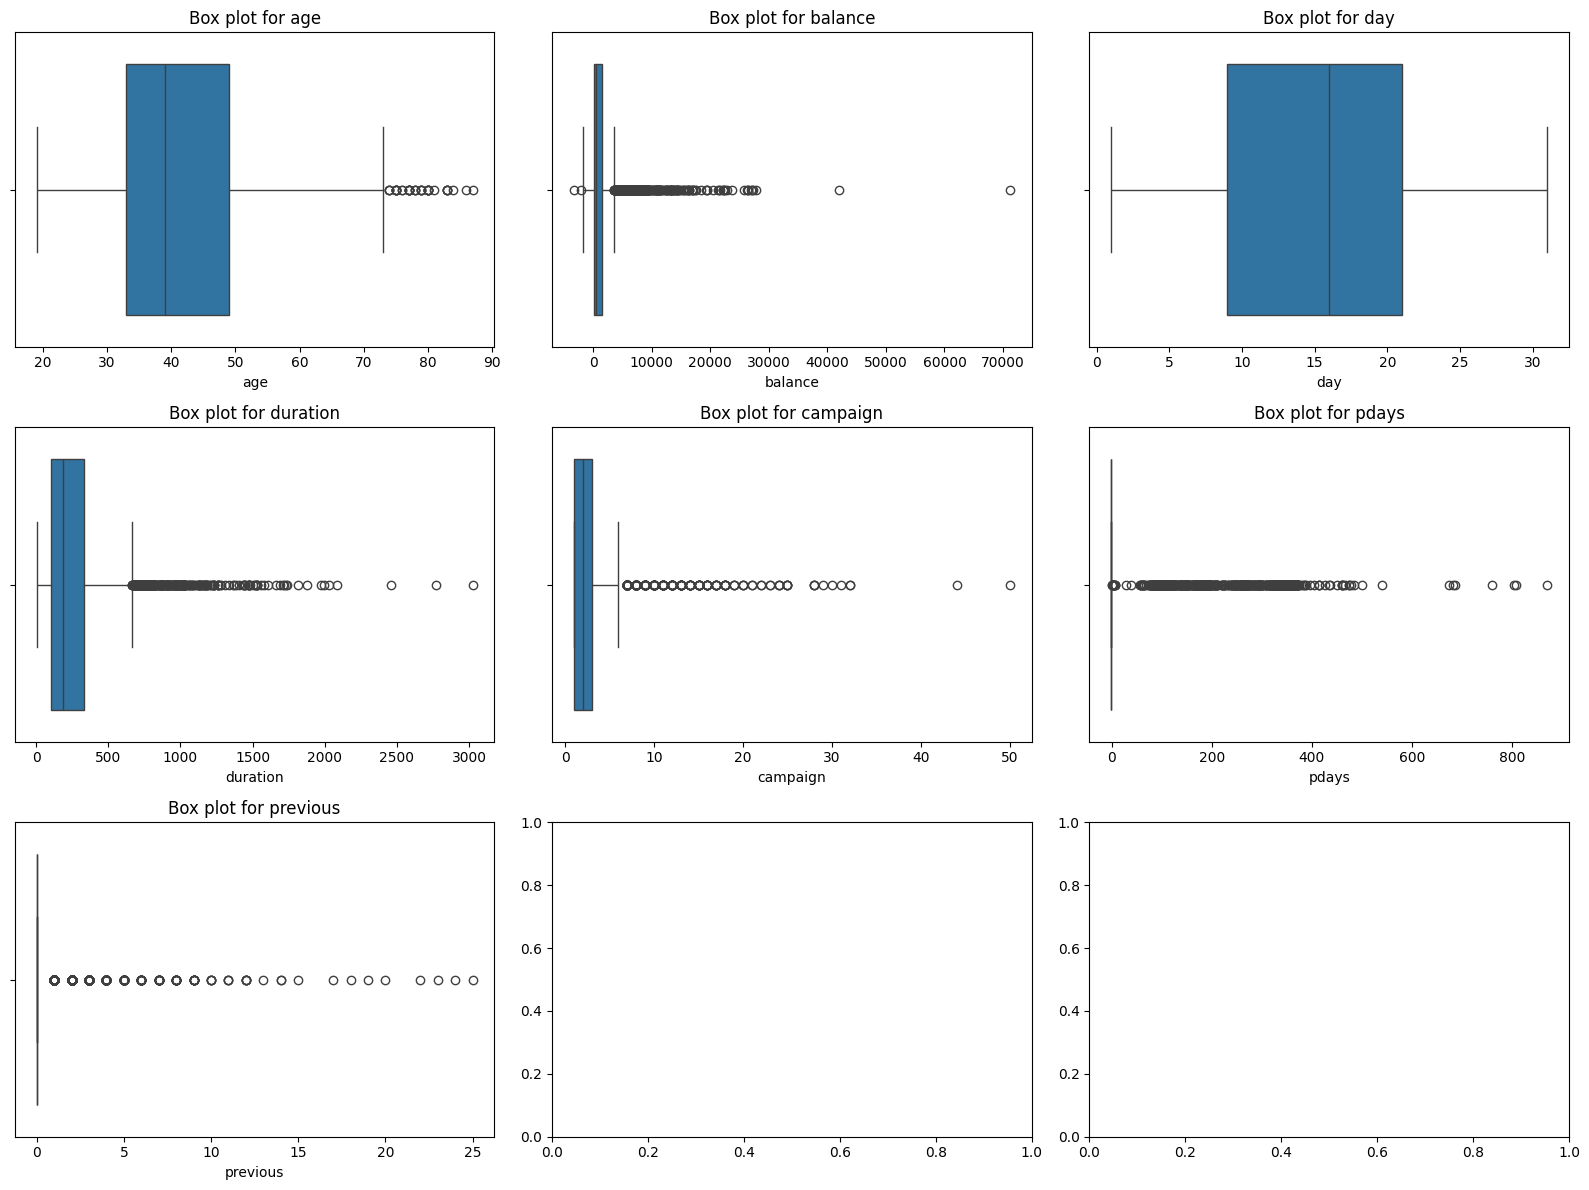

In [33]:
# Box Plot
def statistics_nvar(data, numerical_cols):
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize=(16, 4 * nrow_plots))
    axs = axs.flatten()
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(x=data[col], ax=axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

    # Boxplot for each numerical column
statistics_nvar(data, numerical_cols)


In [34]:
# Statistical Metrics
print(data[numerical_cols].describe())

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


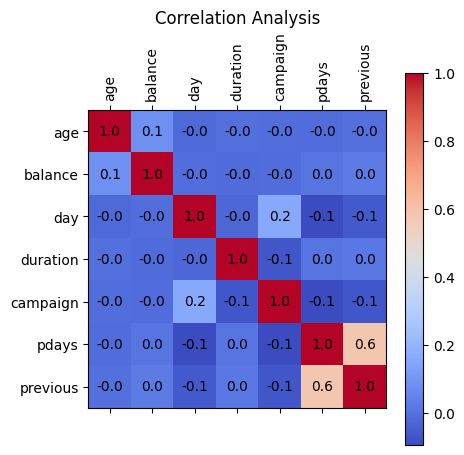

In [41]:
# Correlation Analysis
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap="coolwarm")  
    plt.xticks(range(len(cols)), cols, rotation=90)
    plt.yticks(range(len(cols)), cols)
       # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

plot_correlation(data, numerical_cols)

The heatmap of correlations shows the relationship between different numerical variables in the dataset. Values closer to 1 indicate a strong positive correlation, while values closer to -1 indicate a strong negative correlation. It helps to identify which variables might be related to each other.


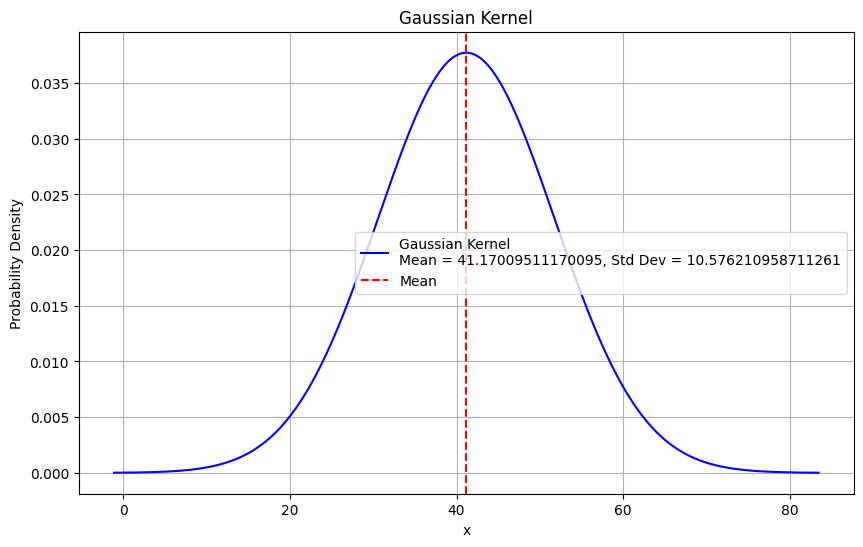

In [48]:
# Calculate mean and standard deviation for the 'age' column
mean_age = data['age'].mean()
std_dev_age = data['age'].std()

# Function to plot Gaussian kernel
def plot_gaussian_kernel(mean, std_dev):    
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)
    
    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function with the calculated mean and standard deviation
plot_gaussian_kernel(mean=mean_age, std_dev=std_dev_age)


The Gaussian Kernel plot visualizes the age distribution in the dataset. The red vertical line represents the mean age. The curve shows how likely it is to find an individual in a specific age range, with higher density around the mean.


In [52]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile
call_percentile(z = -2)
#2.275

from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(data, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = data[col].quantile(lower_percentile / 100)
    upper_bound = data[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    return outliers
outliers_detection(data, "age").head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,NaN,yes
27,67,retired,married,NaN,no,696,no,no,telephone,17,aug,119,1,105,2,failure,no
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,NaN,yes
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,NaN,yes
39,23,services,single,tertiary,no,363,yes,no,NaN,30,may,16,18,-1,0,NaN,no


In [58]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(data, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(data), 2)} %")


*** Outliers detection in age ***
#samples outlier to distribution = 163
%outliers = 3.61 %

*** Outliers detection in balance ***
#samples outlier to distribution = 206
%outliers = 4.56 %

*** Outliers detection in day ***
#samples outlier to distribution = 86
%outliers = 1.9 %

*** Outliers detection in duration ***
#samples outlier to distribution = 202
%outliers = 4.47 %

*** Outliers detection in campaign ***
#samples outlier to distribution = 87
%outliers = 1.92 %

*** Outliers detection in pdays ***
#samples outlier to distribution = 101
%outliers = 2.23 %

*** Outliers detection in previous ***
#samples outlier to distribution = 99
%outliers = 2.19 %


Categorical Variables

In [74]:
categorical_vars = list(set(data.columns) - set(numerical_cols)) 
categorical_vars


['contact',
 'housing',
 'month',
 'loan',
 'education',
 'y',
 'marital',
 'default',
 'job',
 'poutcome']

In [90]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(data[col].value_counts())


***** contact ******
contact
cellular     2896
telephone     301
Name: count, dtype: int64

***** housing ******
housing
yes    2559
no     1962
Name: count, dtype: int64

***** month ******
month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64

***** loan ******
loan
no     3830
yes     691
Name: count, dtype: int64

***** education ******
education
secondary    2306
tertiary     1350
primary       678
Name: count, dtype: int64

***** y ******
y
no     4000
yes     521
Name: count, dtype: int64

***** marital ******
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

***** default ******
default
no     4445
yes      76
Name: count, dtype: int64

***** job ******
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168

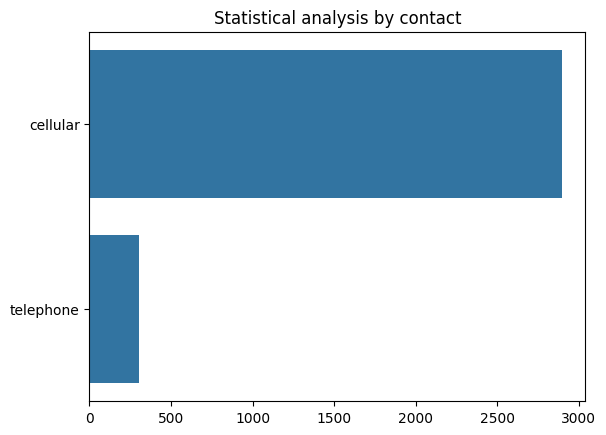

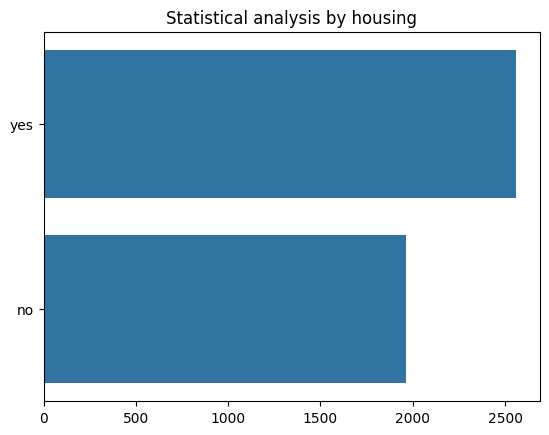

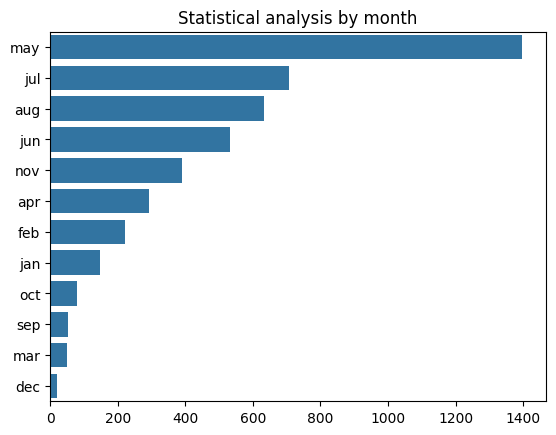

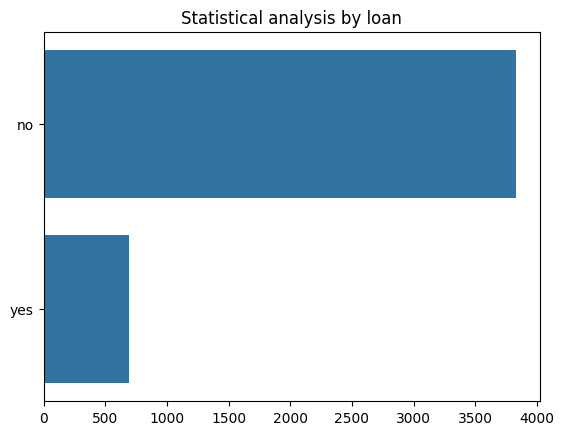

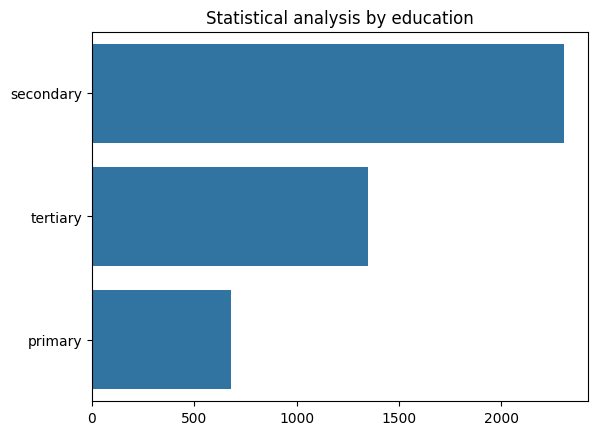

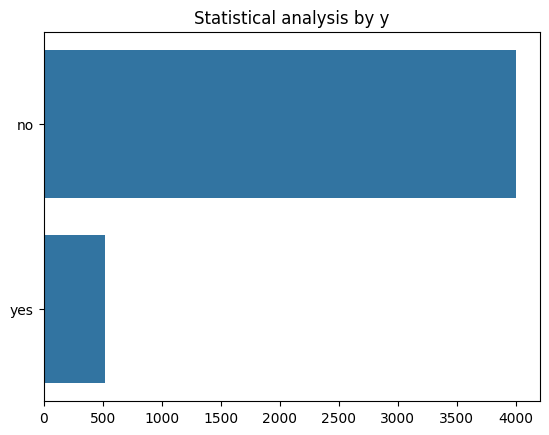

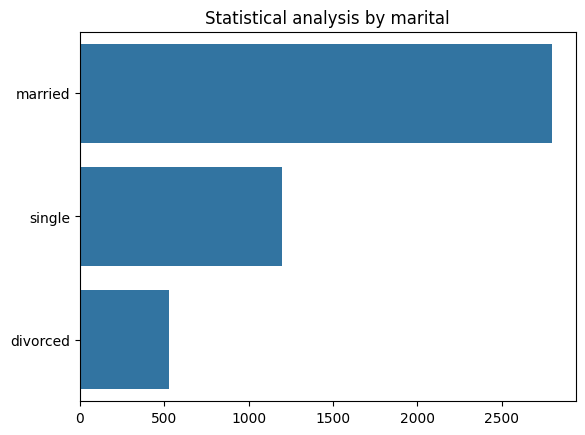

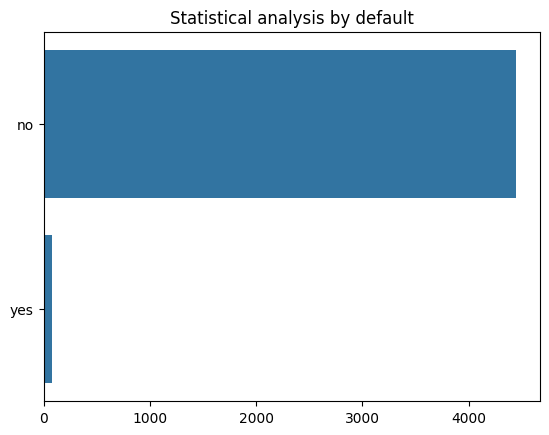

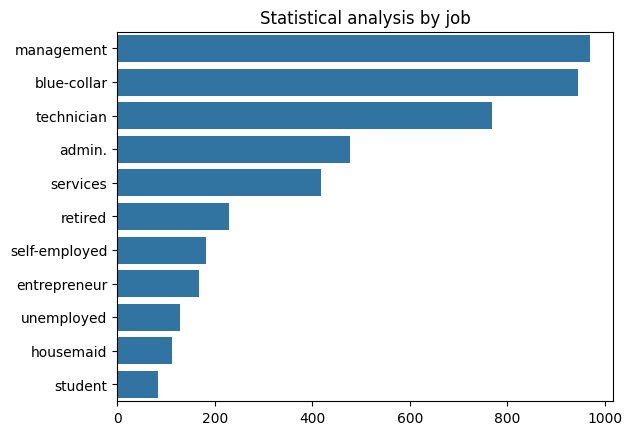

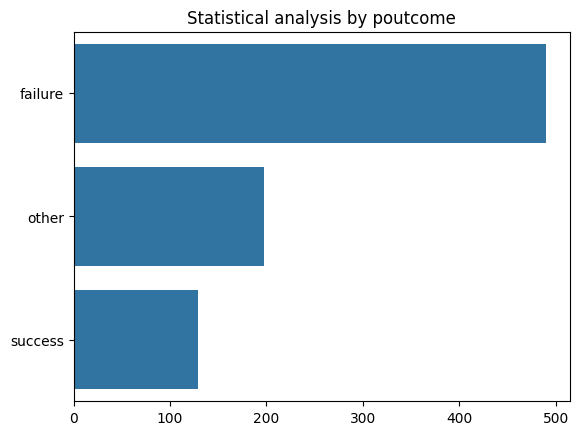

In [93]:

# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(data, col):
    results = data[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

    # cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(data, col)

This bar chart represents the absolute frequencies of each category in the selected categorical column. It shows how many occurrences each category has, helping to understand the distribution of categorical data.


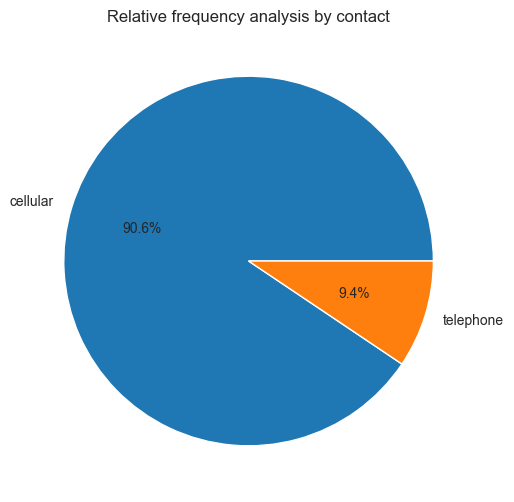

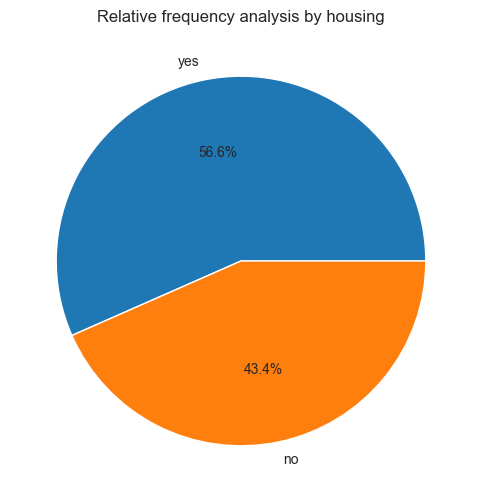

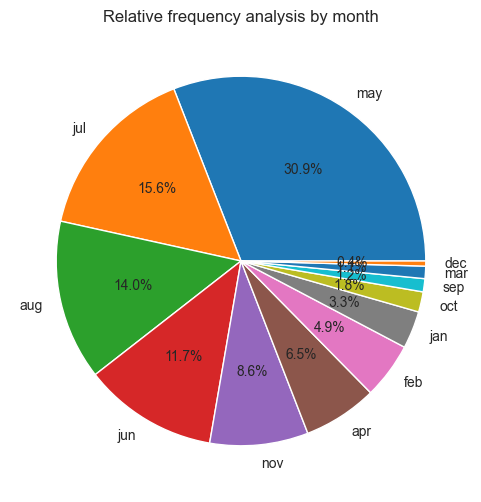

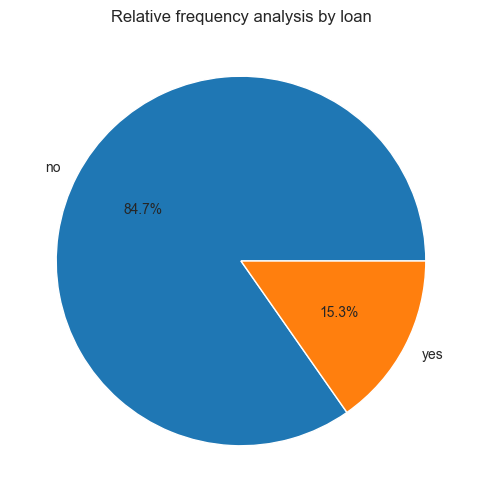

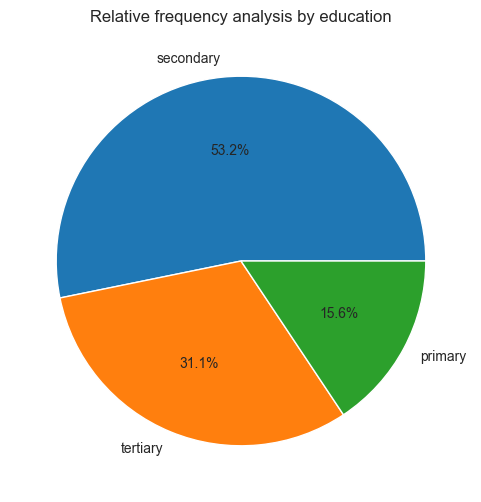

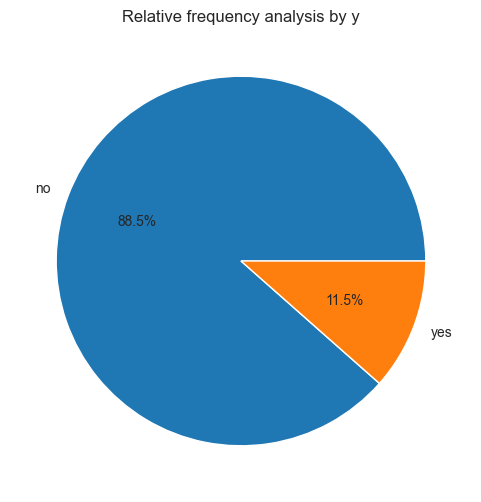

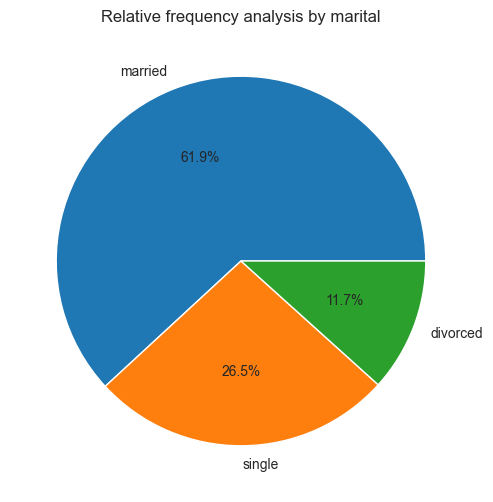

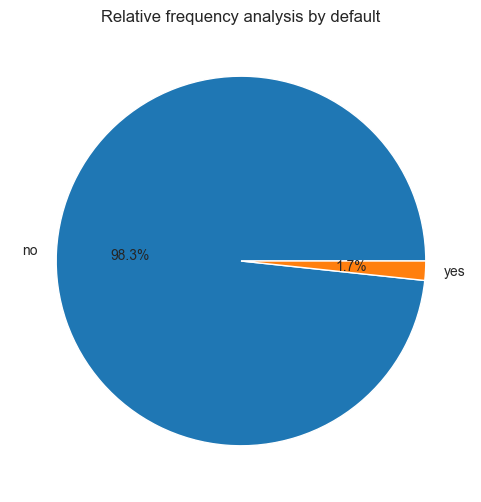

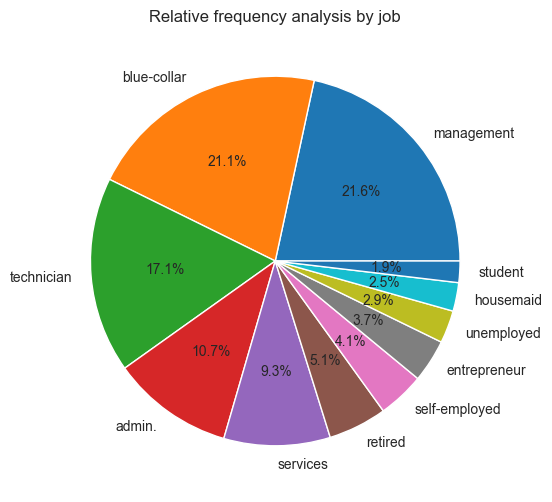

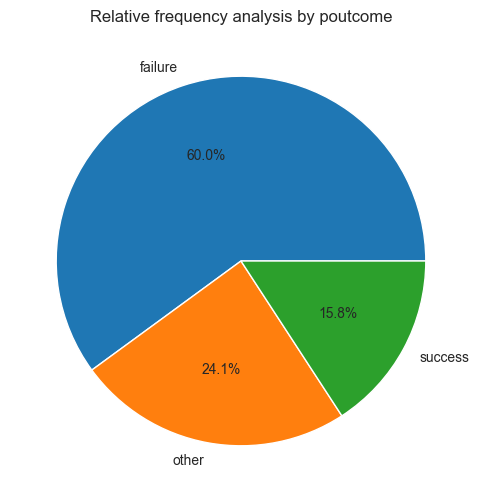

In [108]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = data[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(data, col)

This pie chart displays the relative frequency of each category in the selected categorical column. Each slice represents the proportion of the total that each category occupies, providing a visual way to compare categories.


In [143]:
group_job_outcome = data.groupby(["job", "y"]).size().reset_index(name="samples")
print(group_job_outcome)

              job    y  samples
0          admin.   no      420
1          admin.  yes       58
2     blue-collar   no      877
3     blue-collar  yes       69
4    entrepreneur   no      153
5    entrepreneur  yes       15
6       housemaid   no       98
7       housemaid  yes       14
8      management   no      838
9      management  yes      131
10        retired   no      176
11        retired  yes       54
12  self-employed   no      163
13  self-employed  yes       20
14       services   no      379
15       services  yes       38
16        student   no       65
17        student  yes       19
18     technician   no      685
19     technician  yes       83
20     unemployed   no      115
21     unemployed  yes       13


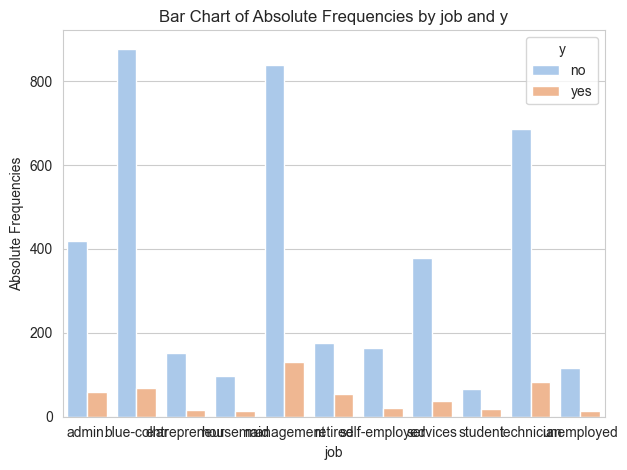

In [144]:
# function to plot absolute frequencies for group
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data=group, x=g1, y="samples", hue=g2, palette="pastel")
    plt.xlabel(g1)
    plt.ylabel('Absolute Frequencies')
    plt.title(f'Bar Chart of Absolute Frequencies by {g1} and {g2}')
    plt.tight_layout()
    plt.show()

plot_absfreq_groups(group_job_outcome, "job", "y")

This bar chart shows the absolute frequencies of different job roles with respect to the outcome. The height of the bars represents the number of samples in each category.


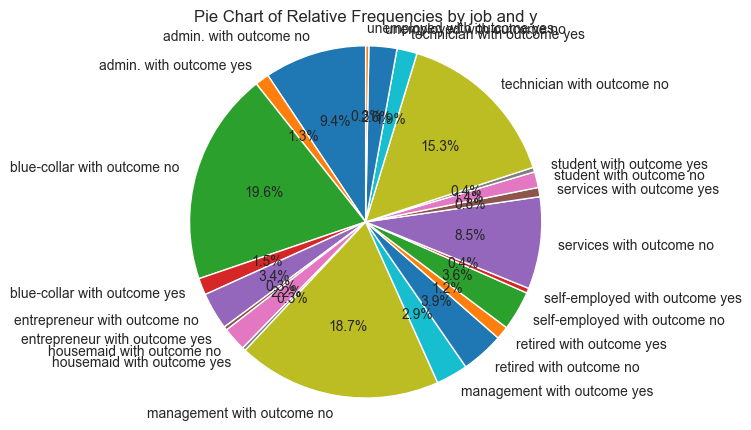

In [152]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with outcome " + group[g2]
    sizes = group["samples"]
    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Pie Chart of Relative Frequencies by {g1} and {g2}')
    plt.show()

plot_relfreq_groups(group_job_outcome, "job", "y")


The pie chart presents the relative frequencies of job categories and their outcomes (subscribed or not). Each slice of the pie represents the percentage of each job category outcome, giving insight into the relative success rate of job types.
